# TimML Notebook 2
## A system with wells, rivers, and recharge

Consider a system of three aquifers. The aquifer parameters are presented in Table 1. Note that an average thickness is specified for the top unconfined aquifer. A river with three branches cuts through the upper aquifer. The river is modeled with a string of 7 head-specified line-sinks and each branch is modeled with strings of 5 head-specified line-sinks. The heads are specified at the ends of the line-sinks and are shown in Figure 1. 

Three wells are present. Well 1 is screened in aquifer 0 and has a discharge of 1000 m$^3$/d, well 2 is screened in aquifer 2 and has a discharge of 5000 m$^3$/d, and well 3 is screened in aquifers 1 and 2 and has a total discharge of 5000 m$^3$/d. A constant recharge through the upper boundary of aquifer 0 is simulated by one large circular infiltration area that covers the entire model area; the recharge rate is 0.2 mm/day. A head of 175 m is specified in layer 0 at the upper righthand corner of the model domain. A layout of all analytic elements, except the boundary of the infiltration area, is shown in Figure 1. 

#### Table 1: Aquifer data for Exercise 2
|Layer        | $k$ (m/d) | $z_b$ (m) | $z_t$ | $c$ (days) | $n$ (-) | $n_{ll}$ (-) |
|------------:|----------:|----------:|------:|-----------:|--------:|----------:|
|Aquifer 0    |   2       |   140     | 165   |      -     |  0.3    |    -      | 
|Leaky Layer 1|   -       |   120     | 140   |    2000    |   -     |   0.2     |    
|Aquifer 1    |   6       |   80      | 120   |      -     |  0.25   |    -      |  
|Leaky Layer 2|   -       |   60      | 80    |    20000   |   -     |   0.25    |  
|Aquifer 2    |   4       |   0       | 60    |      -     |  0.3    |    -      ||

<img src="figs/timml_notebook2_layout.png"> </img>

#### Figure 1: Layout of elements for Exercise 2. Heads at centers of line-sinks are indicated. 

In [1]:
%matplotlib inline
from timml import *
from pylab import *
figsize=(8, 8)

In [2]:
# Create basic model elements
ml = ModelMaq(kaq=[2, 6, 4],
           z=[165, 140, 120, 80, 60, 0],
           c=[2000, 20000],
           npor=0.3)
rf = Constant(ml, xr=20000, yr=20000, hr=175, layer=0)
p = CircAreaSink(ml, xc=10000, yc=10000, R=15000, N=0.0002, layer=0)
w1 = Well(ml, xw=10000, yw=8000, Qw=1000, rw=0.3, layers=0, label='well 1')
w2 = Well(ml, xw=12100, yw=10700, Qw=5000, rw=0.3, layers=2, label='well 2')
w3 = Well(ml, xw=10000, yw=4600, Qw=5000, rw=0.3, layers=[1,2], label='maq well')
#
xy1 = [(833, 14261), (3229, 14843), (6094, 15885), (8385, 15677), (10781, 14895), (12753, 14976)]
hls1 = [176, 166]
xy2 = [(356, 6976), (4043, 7153), (6176, 8400), (9286, 9820), (12266, 9686), (15066, 9466)]
hls2 = [174, 162]   
xy3 = [(1376, 1910), (4176, 2043), (6800, 1553), (9953, 2086), (14043, 2043), (17600, 976)]
hls3 = [170, 156]
xy4 = [(9510, 19466), (12620, 17376), (12753, 14976), (13020, 12176),
        (15066, 9466), (16443, 7910), (17510, 5286), (17600, 976)]
hls4 = [170, nan, 166, nan, 162, nan, nan, 156]

ls1 = HeadLineSinkString(ml, xy=xy1, hls=hls1, layers=0)
ls2 = HeadLineSinkString(ml, xy=xy2, hls=hls2, layers=0)
ls3 = HeadLineSinkString(ml, xy=xy3, hls=hls3, layers=0)
ls4 = HeadLineSinkString(ml, xy=xy4, hls=hls4, layers=0)

### Questions:
#### Exercise 2a
Solve the model and create a contour plot.

Number of elements, Number of equations: 9 , 25
.........
solution complete


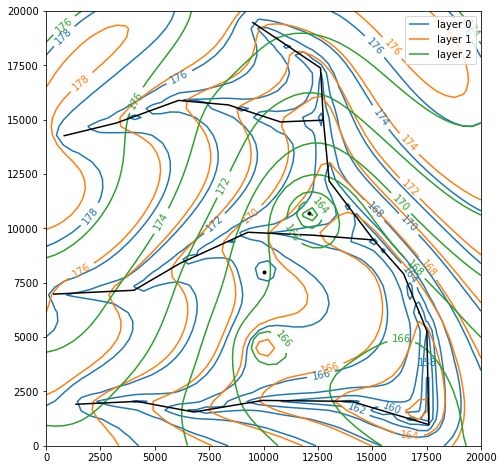

In [3]:
ml.solve()
ml.contour(win=[0, 20000, 0, 20000], ngr=50, layers=[0, 1, 2], 
           levels=10, color=['C0', 'C1', 'C2'], legend=True, figsize=figsize)

#### Exercise 2b
What are the heads at the three wells?

In [4]:
print('The head at well 1 is:', w1.headinside())
print('The head at well 2 is:', w2.headinside())
print('The head at well 3 is:', w3.headinside())

The head at well 1 is: [146.31359961]
The head at well 2 is: [138.96816571]
The head at well 3 is: [153.79722609 153.79722609]


#### Exercise 2c
Create a contour plot including a cross-section.
Create 50-year capture zones for all three wells.

..........
..........
..........
..........


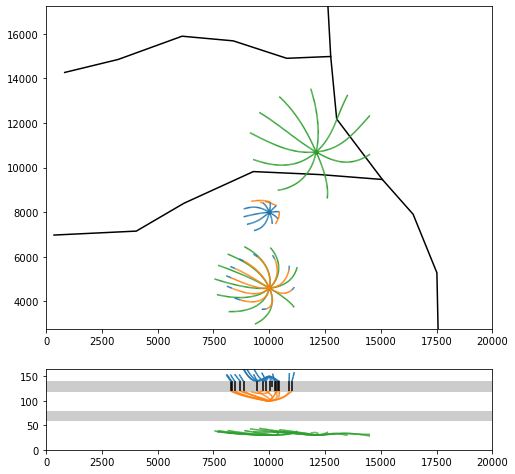

In [5]:
ml.plot(win=[0, 20000, 0, 20000], orientation='both', figsize=figsize)
w1.plotcapzone(hstepmax=50, nt=10, zstart=150, tmax=250 * 365.25, orientation='both')
w2.plotcapzone(hstepmax=50, nt=10, zstart=30, tmax=250 * 365.25, orientation='both')
w3.plotcapzone(hstepmax=50, nt=10, zstart=30, tmax=250 * 365.25, orientation='both')
w3.plotcapzone(hstepmax=50, nt=10, zstart=100, tmax=250 * 365.25, orientation='both')

..........
..........
..........
..........


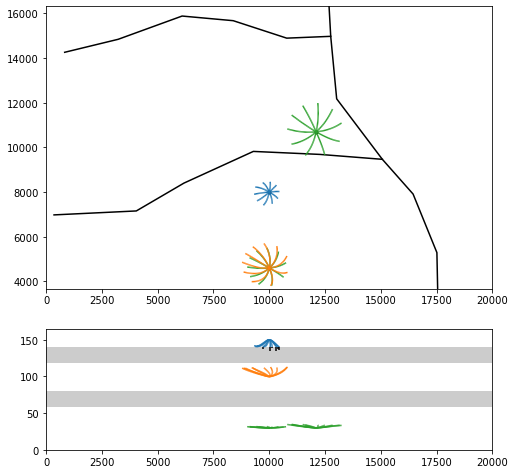

In [6]:
ml.plot(win=[0, 20000, 0, 20000], orientation='both', topfigfrac=0.7, figsize=figsize)
w1.plotcapzone(hstepmax=50, nt=10, zstart=150, tmax=50 * 365.25, orientation='both')
w2.plotcapzone(hstepmax=50, nt=10, zstart=30, tmax=50 * 365.25, orientation='both')
w3.plotcapzone(hstepmax=50, nt=10, zstart=30, tmax=50 * 365.25, orientation='both')
w3.plotcapzone(hstepmax=50, nt=10, zstart=100, tmax=50 * 365.25, orientation='both')